# Retro — Figure 1


In [1]:
import os
import fsspec
import json
import numpy as np
import matplotlib.pyplot as plt

## Load the data


In [2]:
with fsspec.open(
    "https://carbonplan.blob.core.windows.net/carbonplan-retro/results/reclassification-crediting-error.json", "r"
) as f:
    data = json.load(f)

# TODO: explain
del data["ACR360"]
del data["CAR1102"]

In [3]:
with fsspec.open(
    "https://carbonplan.blob.core.windows.net/carbonplan-retro/projects/retro-db-light-v1.0.json",
    "r",
) as f:
    db = json.load(f)
db = list(filter(lambda x: ~(x["id"] == "ACR360") & ~(x["id"] == "CAR1102"), db))

In [4]:
def get(id):
    return [x for x in db if x["id"] == id][0]

In [5]:
# TODO:
numbers = {
    "all": (474, 192996530.0),
    "all_forest": (130, 156069203.0),
    "compliance_ifm": (74, 131462946.0),
    "upfront_ifm": (72, 120954134.0),
}

In [6]:
numbers["analyzed"] = (
    len(data.keys()),
    np.sum([get(key)["arbocs"]["issuance"] for key in data.keys()]),
)

## Make the plot


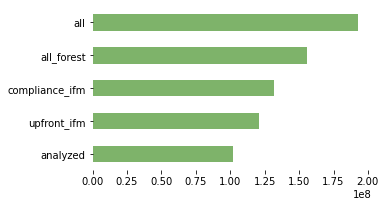

In [7]:
cats = ["analyzed", "upfront_ifm", "compliance_ifm", "all_forest", "all"]

fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.barh(cats, width=[numbers[c][1] for c in cats], height=0.5, color="#7eb36a")


fname = "Figure-1.svg"
if "BLOB_ACCOUNT_KEY" in os.environ:
    with fsspec.open(
        f"az://carbonplan-retro/figures/raw/{fname}",
        "w",
        account_name="carbonplan",
        account_key=os.environ["BLOB_ACCOUNT_KEY"],
    ) as f:
        fig.savefig(f, format="svg")
else:
    plt.savefig(fname)